# Classification model using KNNN

### 1. Import libraries

In [1]:
import pandas as pd
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.spatial import distance
from sklearn import model_selection

### 2. Upload RNA data

In [2]:
path ='../../../../Data_preprocessing//RNA post_autoencoder+Clinic joined/Clinical_data_and_RNA_15_Features_PFS.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,IL25,LANCL1-AS1,LEMD1,PCMT1,RP11-120J4.1,RP11-374M1.2,SDR42E1,TARBP2,TRIM43B,VN2R17P
0,0,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,0.693666,0.817111,0.678721,0.936250,0.663654,0.786407,1.000000,0.912529,0.587310,0.863040
1,1,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,0.693666,0.817111,0.926248,0.958908,0.663654,0.786407,0.694015,0.903036,0.587310,0.863040
2,2,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,0.693666,0.817111,0.880799,0.922139,0.663654,0.786407,0.869025,0.898032,0.587310,0.863040
3,3,G138701_RCCBMS-00116-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,1.216438,1.374775,...,0.686828,0.794290,0.894078,0.921230,0.650857,0.772962,0.931136,0.873870,0.564337,0.855268
4,4,G138701_RCCBMS-00136-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,2.860274,1.374775,...,0.689921,0.983649,0.802636,0.929383,0.793946,0.776255,0.902087,0.896762,0.552830,0.857563


In [3]:
X = data[['DLGAP4', 'EIF4A1P9', 'FAM172BP', 'GJA9', 'GPR155', 'IL25', 'LANCL1-AS1', 'LEMD1', 'PCMT1', 'RP11-120J4.1', 'RP11-374M1.2', 'SDR42E1', 'TARBP2', 'TRIM43B', 'VN2R17P']] #Seleccionamos todas las columnas quitando la columna Unnamed (id de la fila ) y la columna Target.
Y = []

for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    else:
        Y.append(1)# If PFS is over 3 months, I will consider it as Responder (R)

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)

# Convert sets to arrays
XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 115
Target column size of the training set: 115
Test set size: 29
Target column size of the test set: 29


### 4. Study the best value for K

In [5]:
neighbors = list(range(1,8))
cek = []
list_accuracy = []
best_acuracy = 0
best_k = 0
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    pred = knn.fit(XTrain, yTrain).predict(XTest)
    if accuracy_score(yTest, pred) >= best_acuracy:
        best_k = k
        best_acuracy=accuracy_score(yTest, pred)
    list_accuracy.append(accuracy_score(yTest, pred))

print("Best accuracy is obtained with k = " + str(best_k)+ " and is: %.4f" % (best_acuracy))


Best accuracy is obtained with k = 6 and is: 0.5862


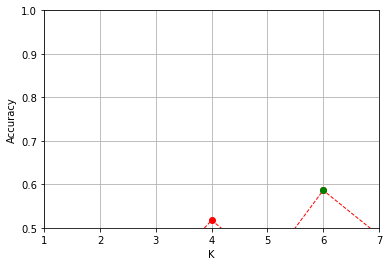

In [6]:
plt.plot(np.append(np.roll(list_accuracy,1),list_accuracy[6]),'ro', color='r', linestyle='dashed',linewidth=1.0, label="Graph2")
# Green dot represent best K value
plt.plot(best_k, best_acuracy, 'ro', color ='g')
plt.axis([1, 7, 0.5, 1])
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.grid()
plt.show()

### 5. Best metric study (manhattan or euclidean)

In [7]:
# Euclidean distance model
euclid_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.sqeuclidean)
euclid_model.fit(XTrain,yTrain) 

# Manhattan distance model
manhattan_model = KNeighborsClassifier(n_neighbors=best_k, metric=distance.cityblock) 
manhattan_model.fit(XTrain, yTrain)

KNeighborsClassifier(metric=<function cityblock at 0x00000285D80F9F70>,
                     n_neighbors=6)

### 6. Predictions

In [8]:
manhattan_predictions = manhattan_model.predict(XTest)
euclid_predictions = euclid_model.predict(XTest) 
df = pd.DataFrame({'actual': yTest, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,0,0,0


In [9]:
# Cross validation
result1= model_selection.cross_val_score(euclid_model, XTrain, yTrain, cv=5, scoring='accuracy')
result2 = model_selection.cross_val_score(manhattan_model, XTrain, yTrain, cv=5, scoring='accuracy')
print("Best result of the cross validation of the model (euclidean) with the best paramters:" +str(np.mean(result1)))
print("Best result of the cross validation of the model (manhattan) with the best paramters:" +str(np.mean(result2)))


Best result of the cross validation of the model (euclidean) with the best paramters:0.5043478260869565
Best result of the cross validation of the model (manhattan) with the best paramters:0.5652173913043479


#### 6.1. Manhattan model

In [10]:
# Making predictions with the optimal model on the training dataset
yhatTrain = manhattan_model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [11]:
# Making predictions with the optimal model on the test dataset
mayhatTest = manhattan_model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (mayhatTest[i] == yTest[i]):
        contTest = contTest + 1

In [12]:
print('Final accuracy on the training dataset (manhattan): ' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset (manhattan): ' + str(contTest/len(yTest)))

Final accuracy on the training dataset (manhattan): 0.6086956521739131
Final accuracy on the testing dataset (manhattan): 0.5517241379310345


In [13]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[60  6]
 [39 10]]
Input data:  [0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1
 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1
 0 1 0 0]
Prediction:        [0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0]


In [14]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.61      0.91      0.73        66
           1       0.62      0.20      0.31        49

    accuracy                           0.61       115
   macro avg       0.62      0.56      0.52       115
weighted avg       0.61      0.61      0.55       115



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, mayhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(mayhatTest))

----------------Confusion Matrix (Test)------------------
[[16  3]
 [10  0]]
Input data:  [1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0]
Prediction:        [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [16]:
print(classification_report(yTest, mayhatTest))

              precision    recall  f1-score   support

           0       0.62      0.84      0.71        19
           1       0.00      0.00      0.00        10

    accuracy                           0.55        29
   macro avg       0.31      0.42      0.36        29
weighted avg       0.40      0.55      0.47        29

